In [44]:
print("Running EDA on housing data, referencing \' hands on machine learning\' data and lessons")

Running EDA on housing data


In [45]:
import pandas as pd

data_path = './data/housing.csv'
housing_df = pd.read_csv(data_path)


In [46]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [47]:
housing_df.info()
# notice missing data in total_bedrooms column, also type of ocean_proximity (this is a categorical col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [49]:
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

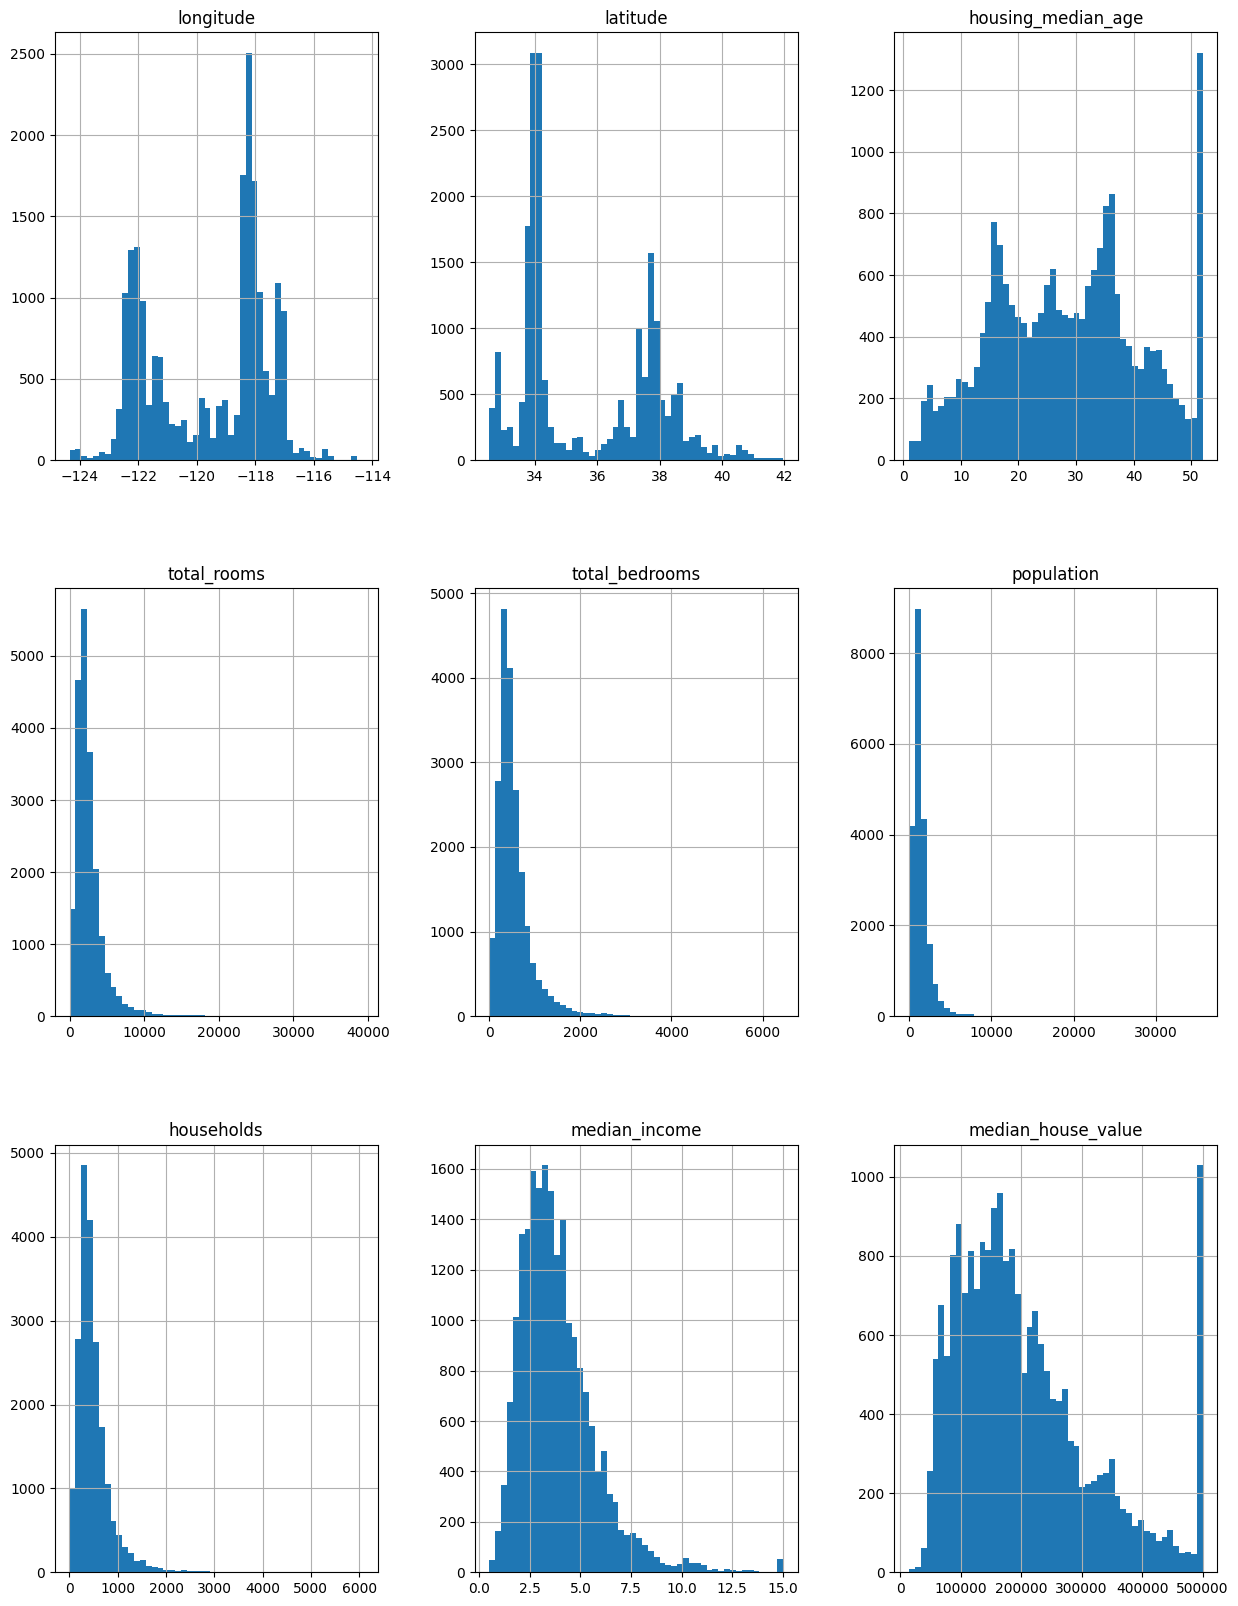

In [50]:
# %matplotlib inline       # apparently only in a jupyter notebook, but seems unnecessary any longer 
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize=(15, 20))
# plt.show()     # optional

## Begin Data Pre-processing

In [51]:
import numpy as np
# manual impl to split data set but will create different sets (of same size) each time run
def split_train_test(data, split_ratio):
    shuff_indices = np.random.permutation(len(data))
    test_size = int(len(data) * split_ratio)
    test_indices = shuff_indices[:test_size]
    train_indices = shuff_indices[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


# split the data between the test and train set
train, test = split_train_test(housing_df, split_ratio=0.2)
print(f"Shape of train set: {train.shape}, test set: {test.shape}")

Shape of train set: (16512, 10), test set: (4128, 10)


In [52]:
# another way for a relatively random split but using scikit learn, this time ensuring same indices selection by indicating seed (random_state)
# for large datasets, this might typically be sufficient
from sklearn.model_selection import train_test_split
train, test = train_test_split(housing_df, test_size=0.2, random_state=42) 
print(f"Shape of train set: {train.shape}, test set: {test.shape}")

Shape of train set: (16512, 10), test set: (4128, 10)


C:\Users\youar\AppData\Local\Temp\ipykernel_16108\1259618970.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df["income_cat"].where(housing_df["income_cat"] < 5, 5.0, inplace=True)


array([[<Axes: title={'center': 'income_cat'}>]], dtype=object)

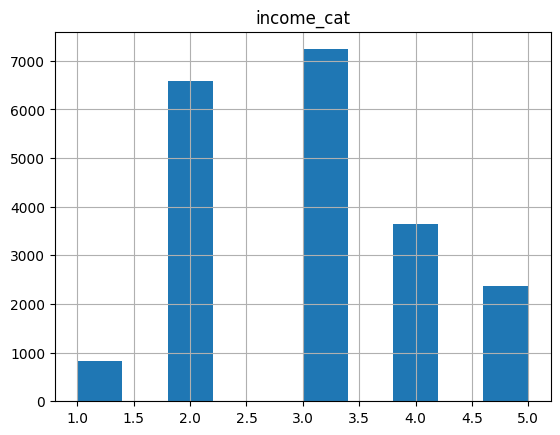

In [53]:
# business says median income is very important to median housing price, so we need to ensure our test
# set represents a real proportion of those incomes, so we attempt to generate a 'stratified sampling'
# this code will essentially create a feature that represents income categories
housing_df["income_cat"] = np.ceil(housing_df["median_income"] / 1.5)
# FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
housing_df["income_cat"].where(housing_df["income_cat"] < 5, 5.0, inplace=True)
housing_df.hist(column="income_cat")


In [54]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    # loc seems smart enough to work, rather than using iloc (which is for numerics rather than labels)
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

# validate that it worked    
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [55]:
# drop the engineered feature from datasets, which will conclude set splitting exercise
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

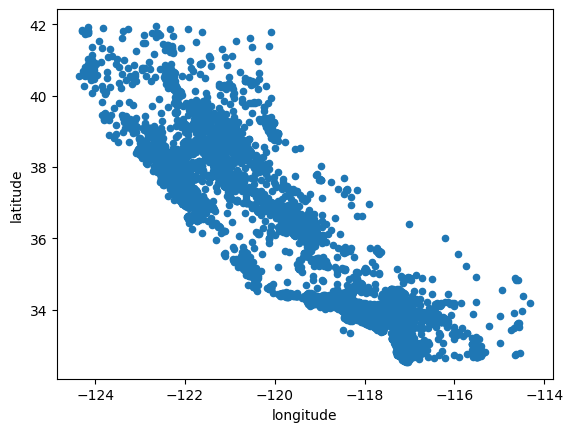

In [56]:
# some visualization (california housing prices)
train_copy = strat_train_set.copy()
train_copy.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

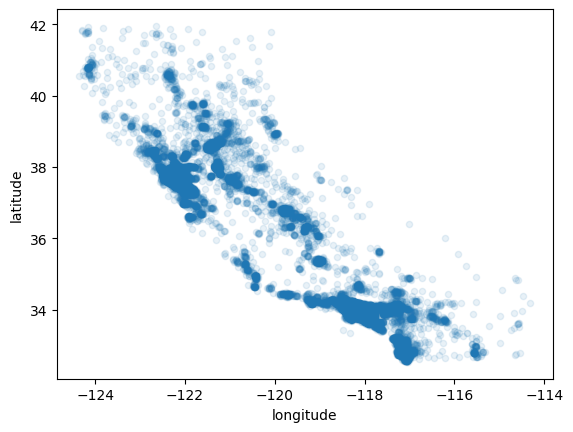

In [57]:
# the alpha parameter provides a much better picture w/respect to density
train_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

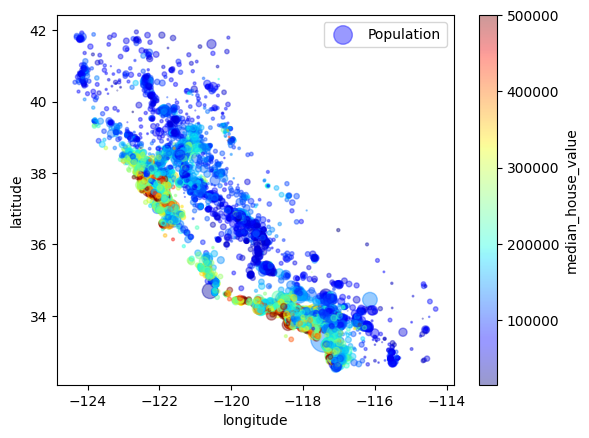

In [58]:
# Better visualization by messing with params
# s => radius of circle represents population
# c => color represents price (using colors defined in 'jet' color map
train_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=train_copy["population"]/100, label="Population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)


In [59]:
# calculate std correlation coefficient between every pair of attributes/columns
# ... also called Pearson's R (fast here since data size small)
# book did not mention it but had to drop categorical col for it to work
correlation_train_copy = train_copy.drop("ocean_proximity", axis=1)
correlation_matrix =  correlation_train_copy.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

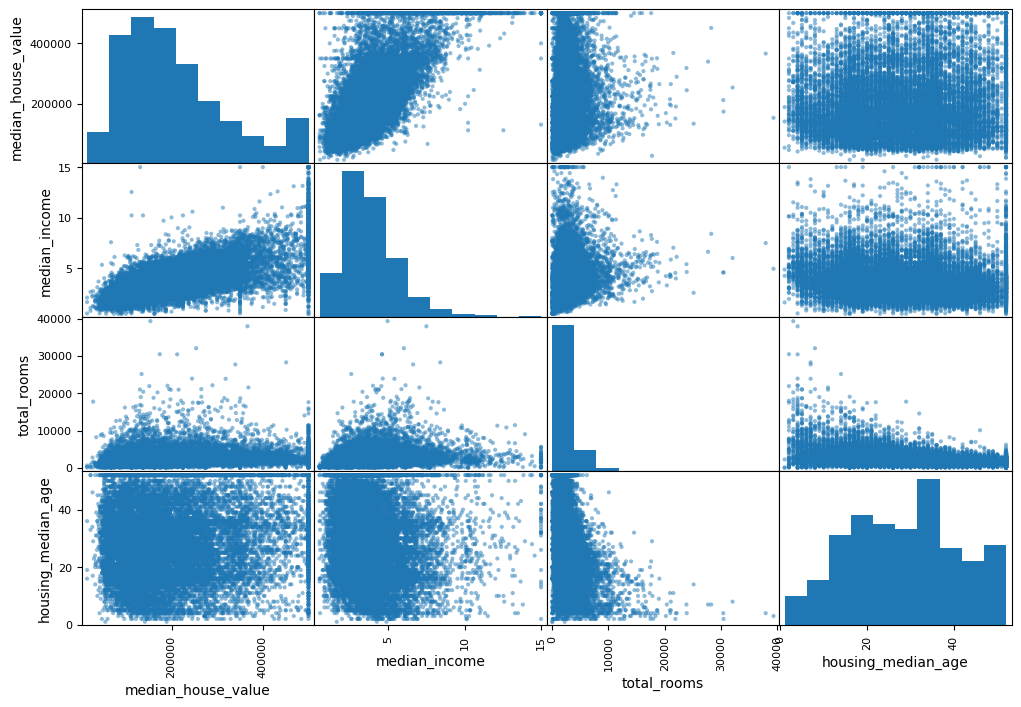

In [60]:
"""
Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute. Since there are now 11 numerical attributes, you would get 112
"""

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]

scatter_matrix(train_copy[attributes], figsize=(12, 8))

# Notice the similarity between the house_value and median_income rows

In [61]:
# Do some feature generation to improve the meaning of various existing features
train_copy["rooms_per_household"] = train_copy["total_rooms"]/train_copy["households"]
train_copy["bedrooms_per_room"] = train_copy["total_bedrooms"]/train_copy["total_rooms"]
train_copy["population_per_household"]=train_copy["population"]/train_copy["households"]
train_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [62]:
# regenerate the correlation to see if new features might clarify anything
correlation_train_copy = train_copy.drop("ocean_proximity", axis=1)
correlation_matrix = correlation_train_copy.corr()
correlation_matrix.head()   # just show the correclation matrix for visibility

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.086883,-0.028364


In [63]:
# show new correlations
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Begin preparing the data for ML algorithms

In [64]:
"""
Revert to a clean training set (by copying strat_train_set once again),
and let’s separate the predictors and the labels since we don’t necessarily want to apply
the same transformations to the predictors and the target values (note that drop()
creates a copy of the data and does not affect strat_train_set
"""
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


Remember from earlier that total_bedrooms was missing data; can deal with missing data in a couple ways:
- Get rid of the corresponding districts.
- Get rid of the whole attribute.
- Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
methods, respectively:
```
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

***This is just for reference, we're not going to actually implement these, rather use a library in following steps***

In [65]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)       # cannot use the imputer for non-numeric features
#Now you can fit the imputer instance to the numerical training data using the fit() method:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [66]:
# compare imputer stats to median values in the training set
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [67]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [68]:
# transform the housing numerical training data
X = imputer.transform(housing_num)
# The result is a plain NumPy array containing the transformed featuresl now transform back to pandas df:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

# continue from page 69 > "Handling Text and Categorical Attributes"

In [69]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [70]:
# algorithms prefer to work with numbers anyway, so let’s convert these categories from text to number
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [71]:
ordinal_encoder.categories_         # These results are not used, just showing categories found by ordinal encoder

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. 

***This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), 
but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are
clearly more similar than categories 0 and 1). To fix this issue, a common solution is
to create one binary attribute per category***: one attribute equal to 1 when the category
is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is
“INLAND” (and 0 otherwise), and so on. 

***This is called one-hot encoding,*** because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

In [72]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
# Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories.
# Using up tons of memory mostly to store zeros
# would be very wasteful, so instead a sparse matrix only stores the location of the non‐zero elements.


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [73]:
housing_cat_1hot.toarray()      # this is opptionally show in case of using a dense matrix (smaller modeling)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom cleanup operations or combining specific
attributes. You will want your transformer to work seamlessly with Scikit-Learn func‐
tionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inher‐
itance), all you need is to create a class and implement three methods: fit()
(returning self), transform(), and fit_transform(). You can get the last one for
free by simply adding TransformerMixin as a base class. Also, if you add BaseEstima
tor as a base class (and avoid *args and **kargs in your constructor) you will get
two extra methods (get_params() and set_params()) that will be useful for automatic 
hyperparameter tuning. For example, here is a small transformer class that adds
the combined attributes we discussed earlier


In [74]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):

        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling
One of the most important transformations you need to apply to your data is feature
scaling. With few exceptions, Machine Learning algorithms don’t perform well when
the input numerical attributes have very different scales. This is the case for the hous‐
ing data: the total number of rooms ranges from about 6 to 39,320, while the median
incomes only range from 0 to 15. Note that scaling the target values is generally not
required.

***There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.
Min-max scaling (many people call this normalization)*** is quite simple: values are
shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐
ing the min value and dividing by the max minus the min. Scikit-Learn provides a
72 | Chapter 2: End-to-End Machine Learning Project
transformer called MinMaxScaler for this. It has a feature_range hyperparameter
that lets you change the range if you don’t want 0–1 for some reason.

***Standardization*** is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that
the resulting distribution has unit variance. Unlike min-max scaling, standardization
does not bound values to a specific range, which may be a problem for some algo‐
rithms (e.g., neural networks often expect an input value ranging from 0 to 1). How‐
ever, standardization is much less affected by outliers. For example, suppose a district
had a median income equal to 100 (by mistake). Min-max scaling would then crush
all the other values from 0–15 down to 0–0.15, whereas standardization would not be
much affected. Scikit-Learn provides a transformer called StandardScaler for stand‐
ardization.

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

(previous cell) The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method). The names can be anything you like (as long as they are
unique and don’t contain double underscores “__”): they will come in handy later for
hyperparameter tuning.

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
all transformers, passing the output of each call as the parameter to the next call, until
it reaches the final estimator, for which it just calls the fit() method.

So far, we have handled the categorical columns and the numerical columns sepa‐
rately. It would be more convenient to have a single transformer able to handle all col‐
umns, applying the appropriate transformations to each column. In version 0.20,
Scikit-Learn introduced the ColumnTransformer for this purpose, and the good news
is that it works great with Pandas DataFrames. Let’s use it to apply all the transforma‐
tions to the housing data:


In [76]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

(previous) Here is how this works: first we import the ColumnTransformer class, next we get the
list of numerical column names and the list of categorical column names, and we
construct a ColumnTransformer. The constructor requires a list of tuples, where each
tuple contains a name22, a transformer and a list of names (or indices) of columns
that the transformer should be applied to. In this example, we specify that the numer‐
ical columns should be transformed using the num_pipeline that we defined earlier,
and the categorical columns should be transformed using a OneHotEncoder. Finally,
we apply this ColumnTransformer to the housing data: it applies each transformer to
the appropriate columns and concatenates the outputs along the second axis (the
transformers must return the same number of rows).

Note that the OneHotEncoder returns a sparse matrix, while the num_pipeline returns
a dense matrix. When there is such a mix of sparse and dense matrices, the Colum
nTransformer estimates the density of the final matrix (i.e., the ratio of non-zero
cells), and it returns a sparse matrix if the density is lower than a given threshold (by
default, sparse_threshold=0.3). In this example, it returns a dense matrix. And
that’s it! We have a preprocessing pipeline that takes the full housing data and applies
the appropriate transformations to each column.


In [77]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()